# 00 Environment

#### 👉Before you solve a Reinforcement Learning problem you need to define what are
- the actions
- the states of the world
- the rewards

#### 👉We are using the `MountainCar-v0` environment from [OpenAI's gym](https://gym.openai.com/envs/MountainCar-v0/)

#### 👉`MountainCar-v0` is still an easy environment, but harder than `Taxi-v3`, which we solved in [part 1](https://github.com/Paulescu/hands-on-rl/tree/main/01_taxi) of the course.

#### 👉`MountainCar-v0` is **not** a tabular environment (i.e. tabular = finite number of actions and states), but with a small trick it can become one. This is why I say it is **still an easy environment**.

#### 👉Let's explore it!

In [6]:
%load_ext autoreload
%autoreload 2
%pylab inline
%config InlineBackend.figure_format = 'svg'

from matplotlib import pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


## Load the environment 🌎

In [7]:
!pip install gymnasium

## Plot it 🎨

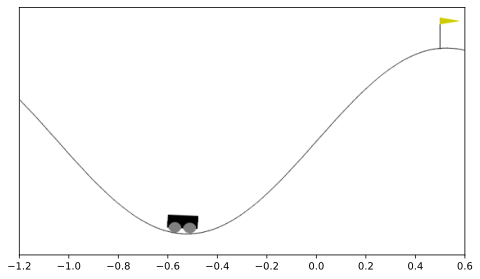

In [8]:
# Workaround for pygame error: "error: No available video device"
# See https://stackoverflow.com/questions/15933493/pygame-error-no-available-video-device?rq=1
# This is probably needed only for Linux
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"

import gymnasium as gym
import matplotlib.pyplot as plt

env = gym.make("MountainCar-v0", render_mode="rgb_array", goal_velocity=0.1)

env.reset()
frame = env.render()

fig, ax = plt.subplots(figsize=(8, 6))
ax.axes.yaxis.set_visible(False)

# Access the unwrapped environment to get min_position and max_position
unwrapped_env = env.unwrapped
ax.imshow(frame, extent=[unwrapped_env.min_position, unwrapped_env.max_position, 0, 1])
plt.show() # this might be needed to display the plot

## Action space

- `0` Accelerate to the left
- `1` Don't accelerate
- `2` Accelerate to the right

In [9]:
print("Action Space {}".format(env.action_space))

Action Space Discrete(3)


## State space

In [10]:
# The state consists of 2 numbers:
# - Car's position, from -1.2 to 0.6
# - Car's velocity, from -0.07 to 0.07
print("State Space {}".format(env.observation_space))

# Access the unwrapped environment to get min_position, max_position, and max_speed
unwrapped_env = env.unwrapped
print(f'Position ranges from {unwrapped_env.min_position} to {unwrapped_env.max_position}')
print(f'Velocity ranges from {-unwrapped_env.max_speed} to {unwrapped_env.max_speed}')

State Space Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Position ranges from -1.2 to 0.6
Velocity ranges from -0.07 to 0.07


## Rewards

- A reward of -1 is awarded if the position of the car is less than 0.5.
- The episode ends once the car's position is above 0.5, or the max number of steps has been reached: `n_steps >= env._max_episode_steps`

A default negative reward of -1 encourages the car to escape the valley as fast as possible.